In [1]:
#importing data set
import pandas as pd 
data = pd.read_csv('/Users/kolbywilliams/Downloads/Data-Collisions.csv')
print('Pandas imported')

Pandas imported


In [2]:
#stripping data set of needless features
neo_data=  data.drop(['X','Y','OBJECTID','INCKEY','COLDETKEY','REPORTNO','STATUS','INTKEY','EXCEPTRSNCODE','EXCEPTRSNDESC','SEVERITYCODE.1','SEVERITYDESC','SPEEDING','SDOT_COLDESC','INATTENTIONIND','PEDROWNOTGRNT','ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY','INCDATE','ST_COLCODE','SDOT_COLCODE','SDOTCOLNUM'],axis=1)
print('Drops of needless features complete')

Drops of needless features complete


In [3]:
#replacing NaN  values
neo_data=neo_data.fillna(0)
print('na data has been replaced with 0')

na data has been replaced with 0


In [4]:
#transfroming int64 columms into floats and date 
#neo_data['SEVERITYCODE']=neo_data['SEVERITYCODE'].astype(float)
neo_data['PERSONCOUNT']=neo_data['PERSONCOUNT'].astype(float)
neo_data['PEDCOUNT']=neo_data['PEDCOUNT'].astype(float)
neo_data['PEDCYLCOUNT']=neo_data['PEDCYLCOUNT'].astype(float)
neo_data['VEHCOUNT']=neo_data['VEHCOUNT'].astype(float)
neo_data['INCDTTM']=neo_data['INCDTTM'].astype('datetime64[ns]')
print('transfroms completed')


transfroms completed


In [6]:
#getting dummy data for the object data structures
ADDRTYPEs= pd.get_dummies(neo_data['ADDRTYPE'])
COLTYPEs= pd.get_dummies(neo_data['COLLISIONTYPE'])##
JUCTYPEs=pd.get_dummies(neo_data['JUNCTIONTYPE'])##
UNDERINFLs= pd.get_dummies(neo_data['UNDERINFL'])#needs edit
WEATHERs= pd.get_dummies(neo_data['WEATHER'])##
ROADCONDs=pd.get_dummies(neo_data['ROADCOND'])##
LIGHTCONDs= pd.get_dummies(neo_data['LIGHTCOND'])##
HITPARKEDCARs= pd.get_dummies(neo_data['HITPARKEDCAR'])

In [7]:
#adding dummy features to dataset
severity_vs_Addrs=pd.concat([neo_data['SEVERITYCODE'],ADDRTYPEs],axis=1)
#severity_vs_coltypes=pd.concat([neo_data['SEVERITYCODE'],COLTYPEs],axis=1)
#severity_vs_juctypes=pd.concat([neo_data['SEVERITYCODE'],JUCTYPEs],axis=1)
severity_vs_drunk=pd.concat([neo_data['SEVERITYCODE'],UNDERINFLs],axis=1)
#severity_vs_weather=pd.concat([neo_data['SEVERITYCODE'],WEATHERs],axis=1)
#severity_vs_road=pd.concat([neo_data['SEVERITYCODE'],ROADCONDs],axis=1)
#severity_vs_lights=pd.concat([neo_data['SEVERITYCODE'],LIGHTCONDs],axis=1)
severity_vs_parkedcars=pd.concat([neo_data['SEVERITYCODE'],HITPARKEDCARs],axis=1)
print('Re combinations finished')

Re combinations finished


In [8]:
from sklearn.model_selection import train_test_split as TTS
from sklearn import linear_model as LM
from sklearn.metrics import mean_squared_error, r2_score

print('sklearn and linear_model imported')

sklearn and linear_model imported


In [9]:
x=neo_data['PERSONCOUNT']
y=neo_data['SEVERITYCODE']

x=x.values.reshape(-1,1)
y=y.values.reshape(-1,1)

x_train, x_test, y_train, y_test= TTS(x,y,random_state=0)

LinR = LM.LinearRegression()

fitted_model1=LinR.fit(x_train,y_train)

print('Score is ',fitted_model1.score(x_test, y_test))

print('Coefficent is ',fitted_model1.coef_)

print('Y intercept is ',fitted_model1.intercept_)

print('equation ',fitted_model1.coef_,'x + ',fitted_model1.intercept_)


Score is  0.0177123787907989
Coefficent is  [[0.04365384]]
Y intercept is  [1.19185955]
equation  [[0.04365384]] x +  [1.19185955]


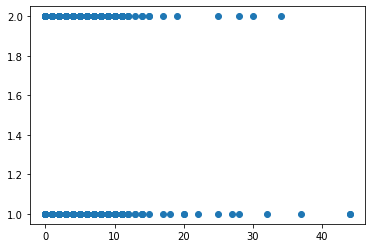

In [38]:
import matplotlib.pyplot as plt

plt.scatter(x_test,y_test)

In [29]:
X=neo_data['PERSONCOUNT']
Y=neo_data['SEVERITYCODE']

X=X.values.reshape(-1,1)
Y=Y.values.reshape(-1,1)

X_train, X_test, Y_train, Y_test= TTS(X,Y,random_state=0)

LogR = LM.LogisticRegression()

fitted_model2=LinR.fit(X_train,Y_train)

print('Score is ',fitted_model2.score(X_test, Y_test))

print('Coefficent is ',fitted_model2.coef_)

print('Y intercept is ',fitted_model2.intercept_)



Score is  0.0177123787907989
Coefficent is  [[0.04365384]]
Y intercept is  [1.19185955]
